# Unsupervised Machine Learning

Table of Contents
1. Import Libraries and Data
2. Prepare Data Set
3. Elbow Technique
4. K-means Clustering

## 1. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/catherinemikelson/Desktop/Career Foundry/Acheivement 6 - Advanced Analytics and Dashboard Design/German Rental Property Analysis/Data/Prepared Data'

In [5]:
df = pd.read_csv(os.path.join(path, 'apt_clean.csv'))

In [6]:
df.shape

(265259, 21)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,Unnamed: 0,state,utility cost,heating type,new construction,balcony,picturecount,pricetrend,year constructed,kitchen,cellar,base rent,condition,pets allowed,lift,type of flat,zipcode,number of rooms,garden,district,city
0,0,Nordrhein_Westfalen,245.00,central_heating,False,False,6,4.62,1965.0,False,True,595.0,well_kept,NaN,False,ground_floor,44269,4.0,True,Dortmund,Schüren
1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,8,3.47,1871.0,False,False,800.0,refurbished,no,False,ground_floor,67459,3.0,False,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,2,Sachsen,255.00,floor_heating,True,True,8,2.72,2019.0,False,True,965.0,first_time_use,NaN,True,apartment,1097,3.0,False,Dresden,Äußere_Neustadt_Antonstadt
3,3,Sachsen,58.15,district_heating,False,True,9,1.53,1964.0,False,False,343.0,NaN,NaN,False,other,9599,3.0,False,Mittelsachsen_Kreis,Freiberg
4,4,Bremen,138.00,self_contained_central_heating,False,True,19,2.46,1950.0,False,False,765.0,refurbished,NaN,False,apartment,28213,3.0,False,Bremen,Neu_Schwachhausen


## 2. Prepare Dataset

In [10]:
df2 = df[['utility cost', 'pricetrend', 'year constructed', 'base rent', 'number of rooms']]

In [11]:
df2.head()

,utility cost,pricetrend,year constructed,base rent,number of rooms
0,245.00,4.62,1965.0,595.0,4.0
1,134.00,3.47,1871.0,800.0,3.0
2,255.00,2.72,2019.0,965.0,3.0
3,58.15,1.53,1964.0,343.0,3.0
4,138.00,2.46,1950.0,765.0,3.0


In [12]:
df2.shape

(265259, 5)

## 3. Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-66028188288.48109,
 -28362412567.05191,
 -16177011638.019333,
 -10479322055.284863,
 -7564087712.698017,
 -5939071920.463275,
 -4874918043.788569,
 -4164413870.230554,
 -3566416664.0351963]

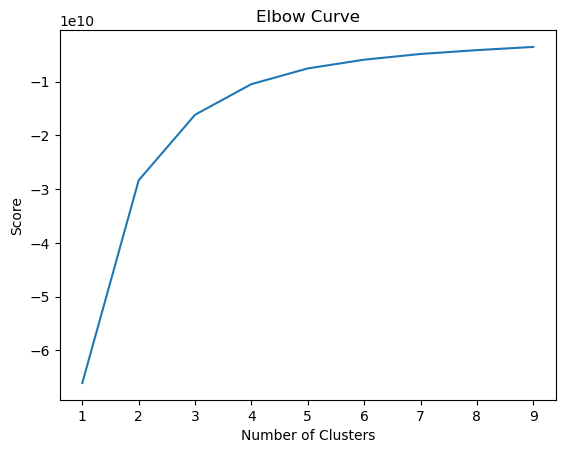

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Note: The curve straighest out after 4, so I will use 4 clusters.

## 4. K-means Clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df2)

KMeans(n_clusters=4)

In [18]:
df2['clusters'] = kmeans.fit_predict(df2)

/var/folders/24/fxftzjqj07701c9k1_h36vlr0000gp/T/ipykernel_1628/3385428573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['clusters'] = kmeans.fit_predict(df2)


In [19]:
df2.head()

,utility cost,pricetrend,year constructed,base rent,number of rooms,clusters
0,245.00,4.62,1965.0,595.0,4.0,0
1,134.00,3.47,1871.0,800.0,3.0,0
2,255.00,2.72,2019.0,965.0,3.0,0
3,58.15,1.53,1964.0,343.0,3.0,1
4,138.00,2.46,1950.0,765.0,3.0,0


In [20]:
df2['clusters'].value_counts()

1    157230
0     76205
3     28423
2      3401
Name: clusters, dtype: int64

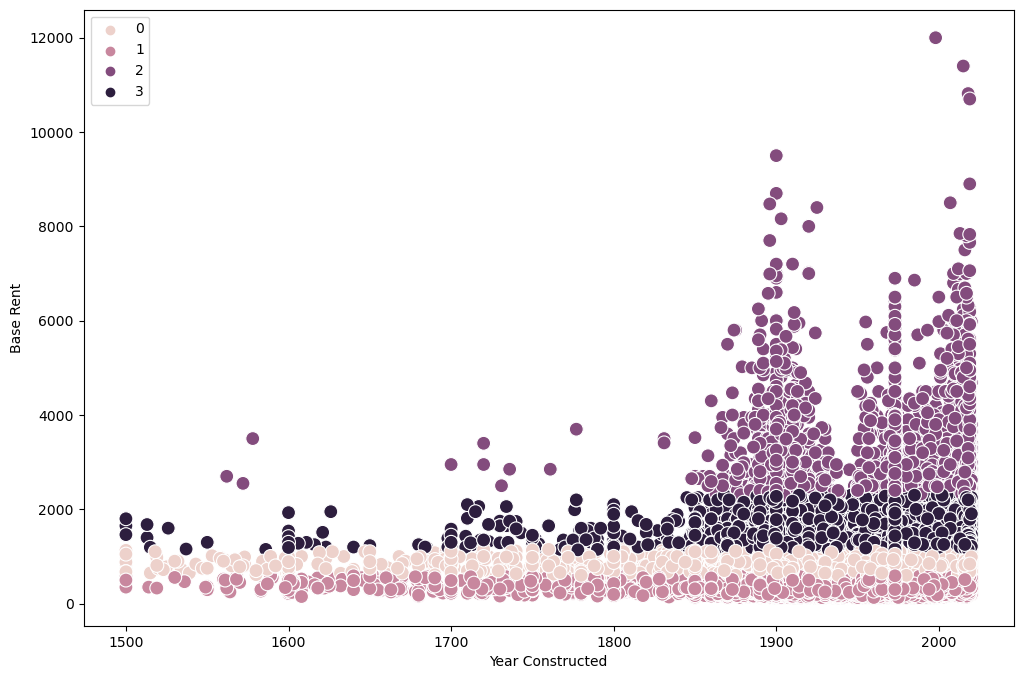

In [22]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['year constructed'], y=df2['base rent'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Year Constructed') # Label x-axis.
plt.ylabel('Base Rent') # Label y-axis.
plt.show()

#### Note: These clusters make sense.  There are clear deliniations in rent price.

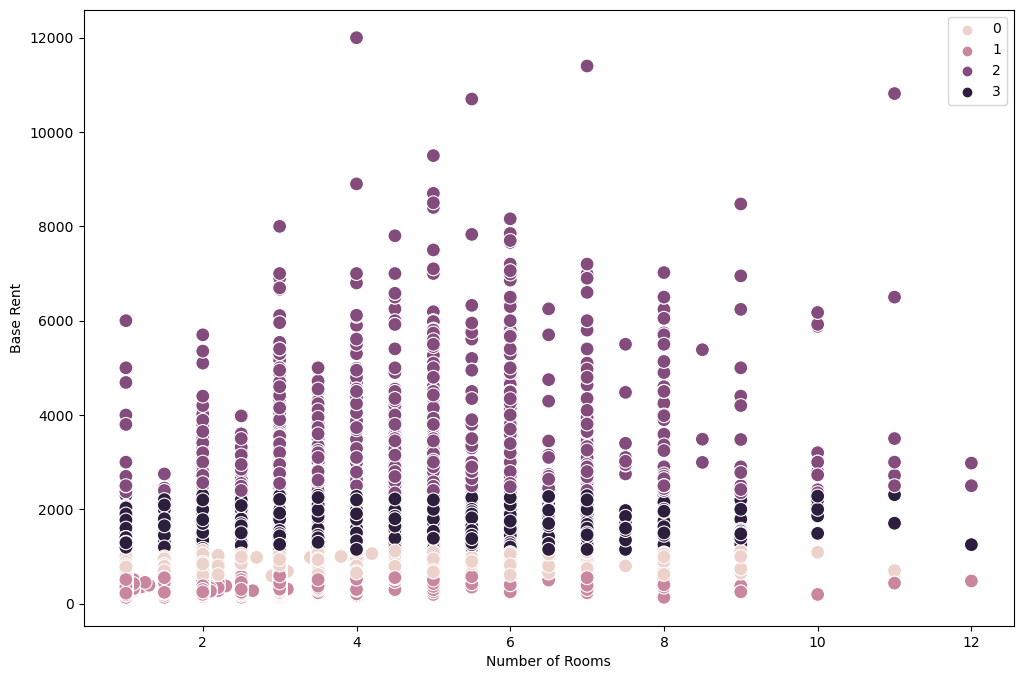

In [23]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['number of rooms'], y=df2['base rent'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Number of Rooms') 
plt.ylabel('Base Rent') 
plt.show()

#### Note: Again, these clusters work and show clear deliniations in cost of rent.

In [32]:
df2.loc[df2['clusters'] == 3, 'cluster'] = 'dark purple'
df2.loc[df2['clusters'] == 2, 'cluster'] = 'purple'
df2.loc[df2['clusters'] == 1, 'cluster'] = 'pink'
df2.loc[df2['clusters'] == 0, 'cluster'] = 'pale pink'

In [33]:
df2.groupby('cluster').agg({'utility cost':['mean', 'median'], 
                         'pricetrend':['mean', 'median'], 
                         'year constructed':['mean', 'median'],
                          'base rent':['mean', 'median'],
                           'number of rooms':['mean', 'median']})

utility cost        pricetrend        year constructed          \
                    mean median       mean median             mean  median   
cluster                                                                      
dark purple   242.346303  250.0   4.937844   4.79      1982.153327  1994.0   
pale pink     173.846709  170.0   4.149663   4.10      1976.073932  1973.0   
pink          116.222232  113.0   2.696611   2.77      1961.560675  1973.0   
purple        389.952576  390.0   5.664302   5.50      1975.568656  1993.0   

               base rent         number of rooms         
                    mean  median            mean median  
cluster                                                  
dark purple  1473.063851  1395.0        3.447103    3.0  
pale pink     800.234037   779.2        2.884640    3.0  
pink          369.459179   360.0        2.325478    2.0  
purple       3165.641132  2840.0        4.185093    4.0

#### Note: When examining the median values each cluster and each variable, purple and dark purple have higher base rent, newer construction and more rooms.  They also have a higher price trend, possibly indicating that these are more desirable units.  It would be inetersting to see these variables in relationship to geographic location.